<a href="https://colab.research.google.com/github/PradnyaPagar01/Play-Store-App-Review-Analysis/blob/main/03_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## -Android is being adopted by a large population across the globe. Android is used in over 74% of the world market, so it's worth creating or developing apps for this mobile operating system.
## -It's also worth investing in apps if you expect them to gain wider traction in the future. To make sure apps are tailored to the needs of users the analysis of data from the Google Play Store apps is extremely valuable. 
## -It can help developers design apps that are tailored to what users want and investors with decisions about how best to invest in future.
## -</b> Let's start the working on Data. </b>

# **A. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Importing Data Set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/project1_play_store_data/Play Store Data.csv'
playstore_df = pd.read_csv(file_path)


# **B. Examine and read the Data Summary**

In [ ]:
# Verify the type of data we are going to study
type(playstore_df)

pandas.core.frame.DataFrame

In [ ]:
# Inspecting the first five rows of the Data set 
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Printing the tail of Data set which is last 5 rows
playstore_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Printing The shape oF Data set
playstore_df.shape

(10841, 13)

## -We have total 10841 Rows and 13 Columns in the Data Set.

In [ ]:
# Printing the information of Dataset to get the better idea of Data type and Memory use 
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## -The info() function is used to print a brief summary of a DataFrame which prints the shape of data i.e. number of rows(entries) and number of columns.This method prints information about a Data Frame including the index dtype and column dtypes, non-null counts and memory usage.

In [ ]:
# Printing the Statistics summary
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## -The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

# **C. Data Cleaning** 

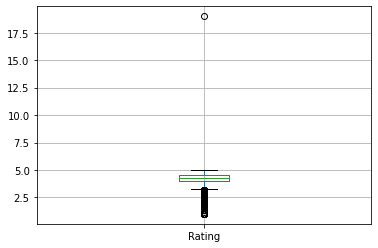

In [ ]:
# lets plot a Box plot for rating column to get some idea about the rating columns
playstore_df.boxplot();

## -A box plot is a method for graphically depicting groups of numerical data through their quartiles.This represents the average of this numerical data.
## -From above observasion we can see there are values which are greater than 5. The rating of every app has to be max 5 and not greater than it so lets try to find out this outlier.


In [ ]:
        # Checking how many outliers are there in Rating column and lets find out which row it is
playstore_df[playstore_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# The category, Rating and Reviews Column have irregular data so i'am dropping this row having an index 10472
playstore_df.drop([10472], inplace = True)

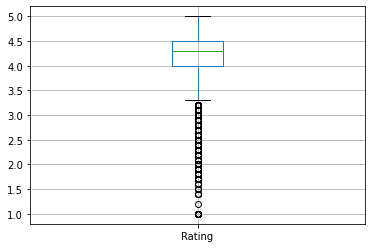

In [ ]:
# Lets check do i successfully droped the unwanted column 
playstore_df.boxplot();

# **D. Data Processing**

## Handling Data Types of each Feature

In [ ]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'
reviews = [i for i in playstore_df['Reviews']]

def clean_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for review in reviews_list:
        if 'M' in review:
            review = review.replace('M', '')
            review = float(review) * 1000000  # 1M = 1,000,000
        cleaned_data.append(review)
    return cleaned_data

playstore_df['Reviews'] = clean_reviews(reviews)
playstore_df['Reviews'] = playstore_df['Reviews'].astype(float)

## -Other Features like Size, Installs, Price and Android Vers also must be of numeric type. The values they are holding must be changed to a proper format so that we can use them for analysis and plots. Example : '10000+' to 10000

In [ ]:
# 2) clean the 'Size' data and change the type 'object' to 'float'

# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'
index = playstore_df[playstore_df['Size'] == '1,000+'].index
playstore_df.drop(axis=0, inplace=True, index=index)

sizes = [i for i in playstore_df['Size']]

def clean_sizes(sizes_list):
    """
    As sizes are represented in 'M' and 'k', we remove 'M'
    and convert 'k'/kilobytes into megabytes
    """
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # 1 megabyte = 1024 kilobytes
        # representing 'Varies with device' with value 0
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data

playstore_df['Size'] = clean_sizes(sizes)
playstore_df['Size'] = playstore_df['Size'].astype(float)

In [ ]:
# 3) clean the 'Installs' data and change the type 'object' to 'float'
installs = [i for i in playstore_df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
playstore_df['Installs'] = clean_installs(installs)
playstore_df['Installs'] = playstore_df['Installs'].astype(float)

In [ ]:
# 4) clean the 'Price' data and change the type 'object' to 'float'
prices = [i for i in playstore_df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

playstore_df['Price'] = clean_prices(prices)
playstore_df['Price'] = playstore_df['Price'].astype(float)

In [ ]:
# look at the random 10 records in the apps dataframe to verify the cleaned columns
playstore_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6968,RC Monster Truck - Offroad Driving Simulator,GAME,4.0,38448.0,27.0,5000000.0,Free,0.00,Everyone,Racing,"June 16, 2018",1.4.3,4.1 and up
2978,MARCA - Sports Leader Diary,SPORTS,3.9,76346.0,14.0,5000000.0,Free,0.00,Everyone,Sports,"July 25, 2018",6.3.3,4.1 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.7,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
4297,Kpop Music Quiz (K-pop Game),FAMILY,4.2,6418.0,59.0,100000.0,Free,0.00,Everyone,Casual,"May 8, 2017",1.3,4.1 and up
3053,Tennis Temple - Live Scores,SPORTS,4.6,5305.0,0.0,100000.0,Free,0.00,Everyone,Sports,"May 18, 2018",Varies with device,Varies with device
8283,Painting Lulu DC Super Friends,BOOKS_AND_REFERENCE,NaN,7.0,17.0,1000.0,Free,0.00,Everyone,Books & Reference,"February 9, 2017",1.2,4.0.3 and up
10381,Gun Disassembly 2,FAMILY,4.1,26347.0,48.0,1000000.0,Free,0.00,Everyone 10+,Entertainment,"September 15, 2017",14.0.1,2.2 and up
6616,BP Scanner Prank,FAMILY,4.1,157.0,7.0,50000.0,Free,0.00,Everyone,Entertainment,"September 20, 2016",1.2,4.0.3 and up
9546,El Nuevo Día,NEWS_AND_MAGAZINES,4.1,8011.0,13.0,500000.0,Free,0.00,Everyone 10+,News & Magazines,"June 13, 2018",4.11.2,4.1 and up
5494,AQ: First Contact,FAMILY,NaN,0.0,0.0,50000.0,Free,0.00,Everyone,Strategy,"July 26, 2018",Varies with device,Varies with device


##  Handling null values in Data

In [ ]:
# counting the number of missing values in the dataframe format
playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

## -Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence, we decided to replace the null values with median of overall 'Rating' values.

In [ ]:
def replace_with_median(series):
    """
    Given a series, replace the rows with null values 
    with median values
    """
    return series.fillna(series.median())

playstore_df['Rating'] = playstore_df['Rating'].transform(replace_with_median)
playstore_df['Rating'] = playstore_df['Rating'].astype(float)

## -Then we apply mode for the Current_Ver,Android__Ver and Type.

In [ ]:
print(playstore_df['Type'].mode())
print(playstore_df['Current Ver'].mode())
print(playstore_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
playstore_df['Type'].fillna(str(playstore_df['Type'].mode().values[0]),inplace=True)
playstore_df['Current Ver'].fillna(str(playstore_df['Current Ver'].mode().values[0]),inplace=True)
playstore_df['Android Ver'].fillna(str(playstore_df['Android Ver'].mode().values[0]),inplace=True)

In [ ]:
#dropping duplicates value in 'App' column using drop_duplicates() function
playstore_df.drop_duplicates(subset='App',inplace=True)

In [ ]:
#Lets check the modified data
playstore_df.shape

(9659, 13)

## -Hence we successfully droped all the duplicates values and Data is ready for analysis.

In [ ]:
# check on statistical information of the dataframe
playstore_df.describe()

,Rating,Reviews,Size,Installs,Price
count,9659.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000
mean,4.192442,2.165926e+05,17.804097,7.777507e+06,1.099299
std,0.496397,1.831320e+06,21.495518,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,9.100000,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# **E. Exploratory Data Analysis and Visualization**

## **1.Find the percentage of app of top 25 and bottom 25 category.**

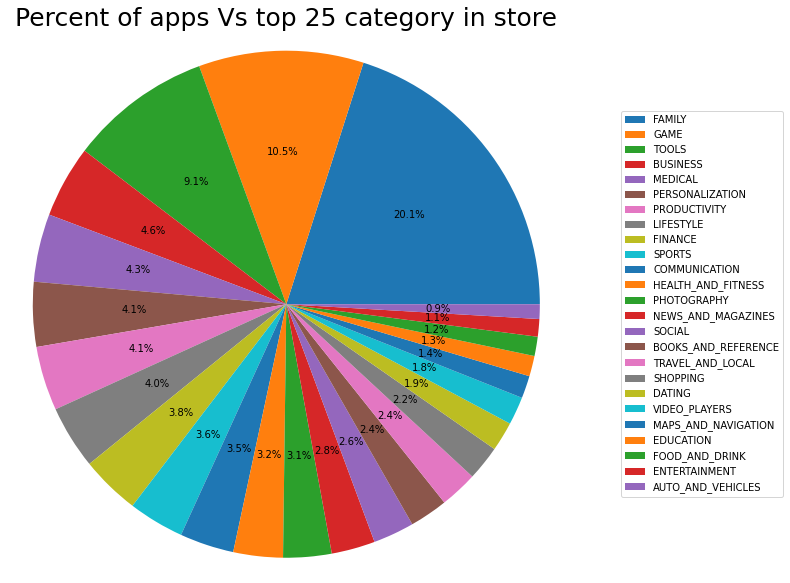

In [ ]:
# Basic pie chart to view distribution of apps across top 25 categories
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

number_of_apps = playstore_df['Category'].value_counts().head(25)

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.title('Percent of apps Vs top 25 category in store',size = 25)
plt.show()

## -Hence we know that most of the apps in the play store are from the categories of  'Family', 'Game' and also 'Tools.

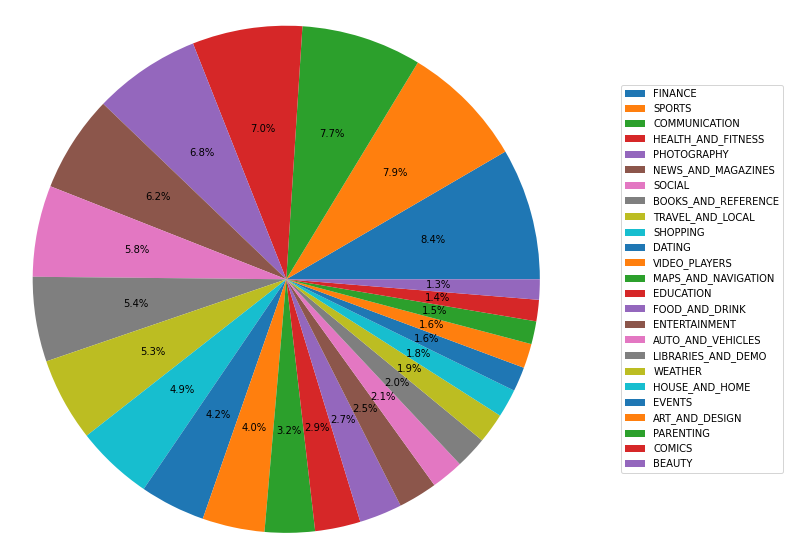

In [ ]:
# Basic pie chart to view distribution of apps across last 25 categories
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

number_of_apps = playstore_df['Category'].value_counts().tail(25)

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

## **2. Study OF distribution of apps in term of their type i.e. free Vs paid.**

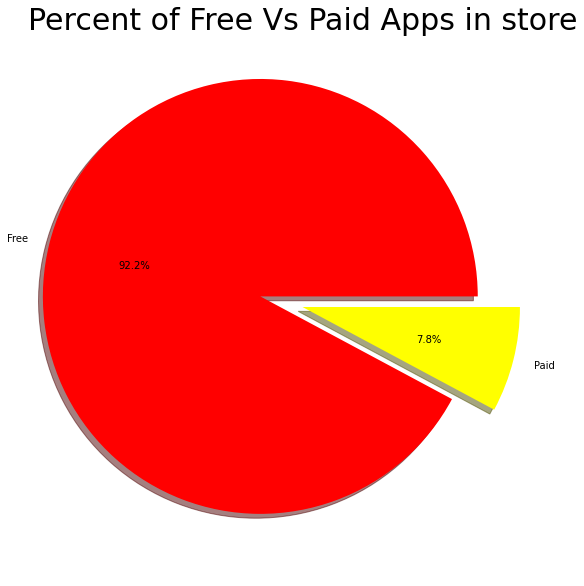

In [ ]:
# Visualisation of free and paid apps on playstore
plt.figure(figsize=(10,10))
labels = playstore_df['Type'].value_counts(sort = True).index
sizes = playstore_df['Type'].value_counts(sort = True)
colors = ["red","yellow"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 30)
plt.show()


## -Such that we can study there are approximate **92%** apps are free and **7.8 %** apps are paid.


# **3. Study OF distribution of average apps rating .**

In [ ]:
# Average App Rating in each Category
avg_rating = playstore_df.groupby('Category')['Rating'].mean()
print(avg_rating)

Category
ART_AND_DESIGN         4.354687
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.173810
COMICS                 4.185714
COMMUNICATION          4.154921
DATING                 4.041520
EDUCATION              4.363866
ENTERTAINMENT          4.135294
EVENTS                 4.395313
FAMILY                 4.194378
FINANCE                4.138551
FOOD_AND_DRINK         4.192857
GAME                   4.249948
HEALTH_AND_FITNESS     4.251736
HOUSE_AND_HOME         4.174324
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.202025
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.166548
PRODUCTIVITY           4.206150
SHOPPING               4.237624
SOCIAL                 4.255230
SPORTS                 4.232923
TOOLS                  4.073881
TRAVEL_AND_LOCAL       4.103196

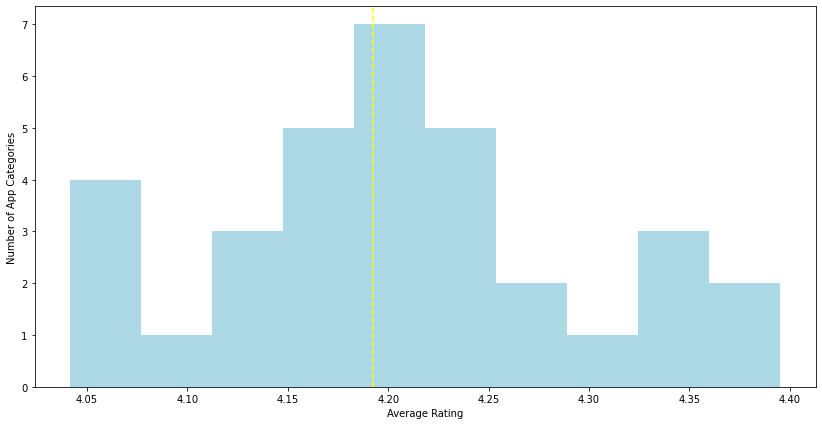

In [ ]:
# Plot a histogram for Average Rating
fig, ax = plt.subplots(figsize = (14,7))
ax.hist(avg_rating,color='lightblue')
ax.axvline(playstore_df['Rating'].mean(),color='yellow',linestyle='--')
plt.xlabel('Average Rating')
plt.ylabel('Number of App Categories')
plt.show()

## **4. Study OF distribution of apps in term of their rating, size and type.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


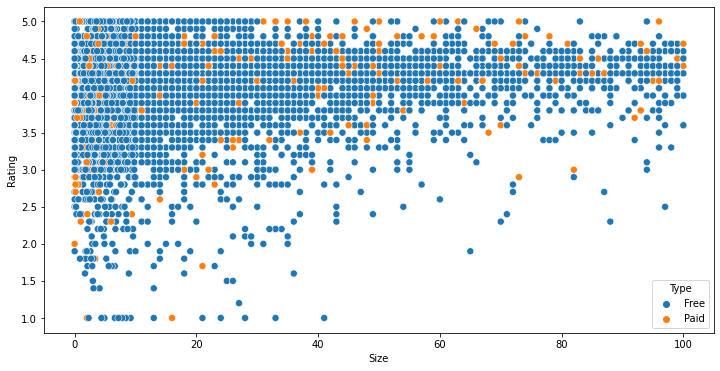

In [ ]:
# show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(playstore_df['Size'],
               playstore_df['Rating'],
               hue=playstore_df['Type'],
               s=50)

## -From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

## **5. Study OF distribution of apps in term of Content Rating.**

In [ ]:
# Number of apps in terms of Content Rating
content_rating = playstore_df['Content Rating'].value_counts()
content_rating

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

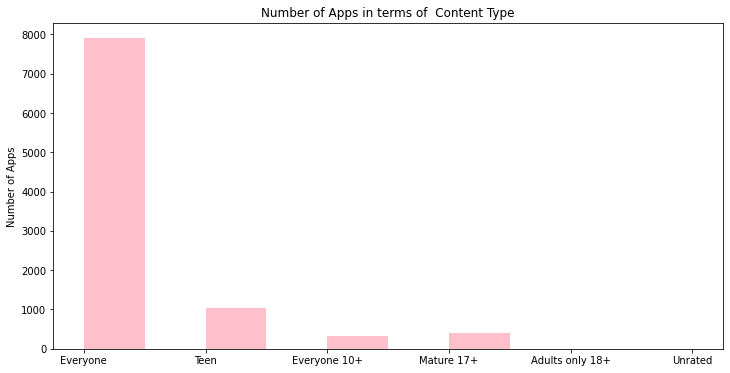

In [ ]:
# Distribute the number of apps Vs their Content Rating
fig = plt.figure(figsize = (12,6))
plt.hist(playstore_df['Content Rating'], color = 'pink')
plt.title('Number of Apps in terms of  Content Type')
plt.ylabel('Number of Apps')
plt.show()
fig.savefig('Number of Apps in terms of Content Type')

## **6. Finding and Counting the numbers of 5 star rating apps.**

In [ ]:
# Number of apps having 5 star rating
full_rating = playstore_df[playstore_df.Rating == 5]
full_rating.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37.0,1000.0,Free,0.0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5.0,4.4,1000.0,Free,0.0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2.0,70.0,100.0,Free,0.0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5.0,9.3,500.0,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0,100.0,Free,0.0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up


In [ ]:
# Number of apps having 5 star rating
full_rating = playstore_df[playstore_df.Rating == 5]
total_full_rating = full_rating['App'].count()
print(f'There are  {total_full_rating} apps having 5 star rating. ')

There are  271 apps having 5 star rating. 


## **7. Analysing the distribution of Genres with Installs apps.**

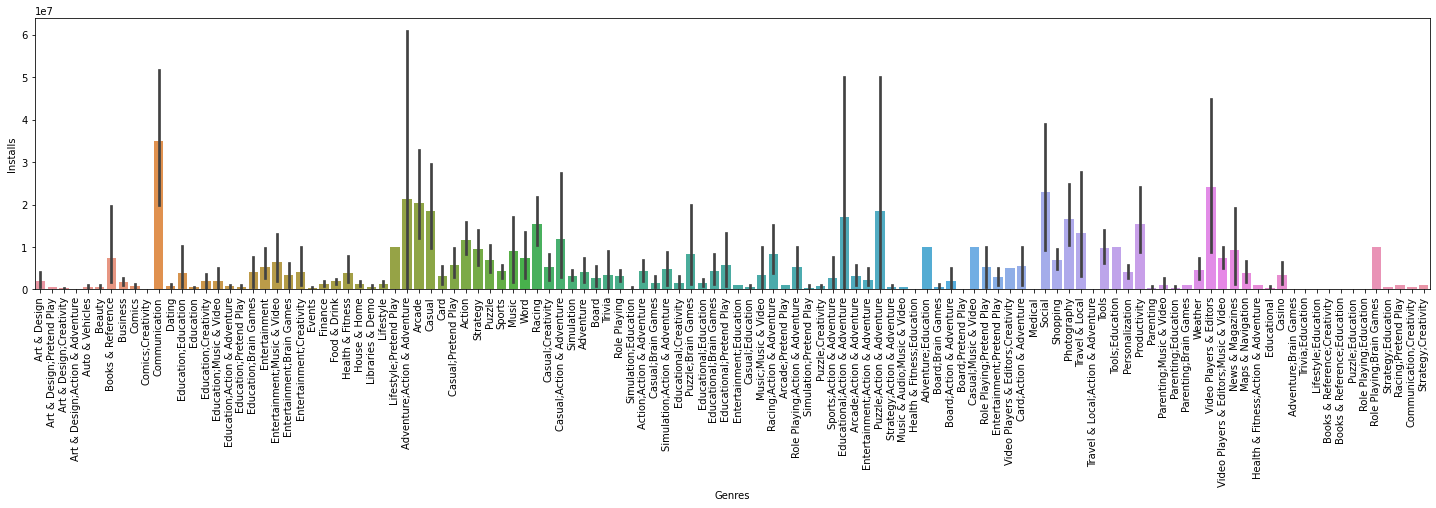

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(x='Genres', y='Installs', data=playstore_df,ax=ax);
plt.xticks(rotation=90);

## **8. Counting the number of installed apps in terms of each Category**
##      **and Study the number of install apps with respect to number of user.**

In [ ]:
#Count total no of instalation
users=playstore_df.groupby(['Category'])['Installs'].sum().reset_index()
users

,Category,Installs
0,ART_AND_DESIGN,1.143381e+08
1,AUTO_AND_VEHICLES,5.313021e+07
2,BEAUTY,2.719705e+07
3,BOOKS_AND_REFERENCE,1.665970e+09
4,BUSINESS,6.971649e+08
5,COMICS,4.498115e+07
6,COMMUNICATION,1.103828e+10
7,DATING,1.409261e+08
8,EDUCATION,3.529520e+08
9,ENTERTAINMENT,2.113660e+09


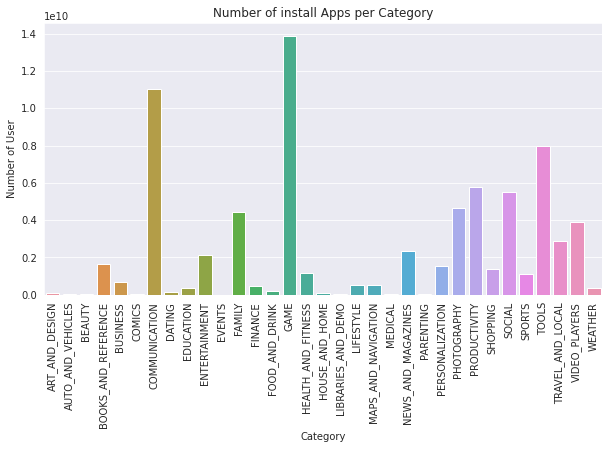

In [ ]:
# Study the number of install apps with respect to number of user
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.barplot(x='Category',y='Installs',data=users)
plt.title('Number of install Apps per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of User')
plt.show()

# **9. Find top 5 apps on the basis of highest installs.**

In [ ]:
# Top 5 apps on the basis of highest installs
df = playstore_df.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,0.0,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,0.0,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


# **10. Find top 5 most installed game.**

## As before we see the most install category app is Game and now see top 5 games install by users.

In [ ]:
#  What is the top 5 most installed apps in Game category?
# Top 5 popular game as for highest no of instalation
df = playstore_df[playstore_df['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1655,Candy Crush Saga,GAME,4.4,22426677.0,74.0,5.000000e+08,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1661,Temple Run 2,GAME,4.3,8118609.0,62.0,5.000000e+08,Free,0.0,Everyone,Action,"July 5, 2018",1.49.1,4.0 and up
1662,Pou,GAME,4.3,10485308.0,24.0,5.000000e+08,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
1722,My Talking Tom,GAME,4.5,14891223.0,0.0,5.000000e+08,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up


# **11. Find top 5 expensive apps.**

In [ ]:
# What is the top 5 expensive apps?

df = playstore_df.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.300000,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.3,0.0,40.000000,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,0.942383,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5358,I am Rich!,FINANCE,3.8,93.0,22.000000,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41.000000,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up


# **12. Camparing Rating given by user from each catagory.**

Avg rating:- 4.1924422818097105


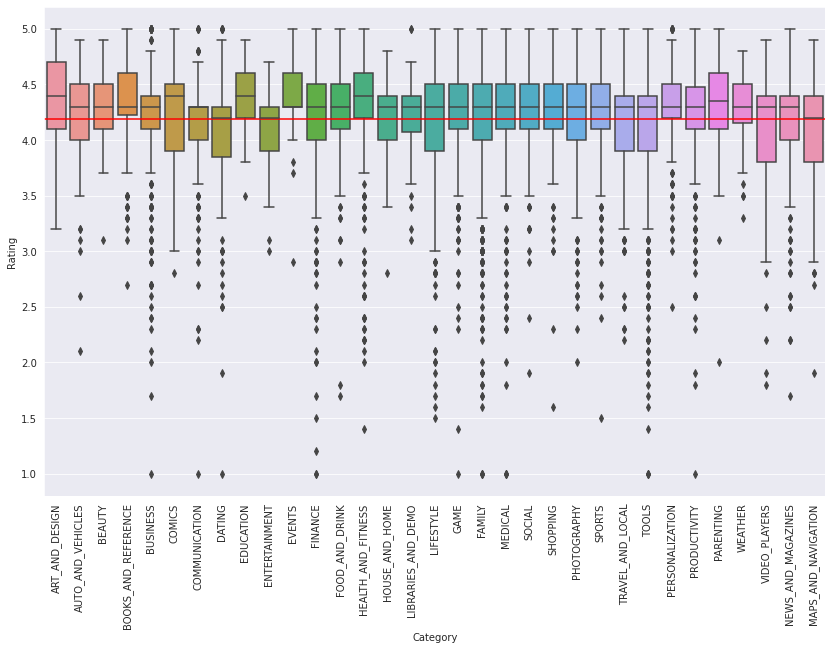

In [ ]:
#Compare the app catagory wise with rating.here we an which catagory get more rating with avg and which is low
plt.figure(figsize=(14,9))


val = sns.boxplot(data=playstore_df, x="Category", y="Rating")
val.axhline(playstore_df['Rating'].mean(),ls="-",color="red")
x=plt.xticks(rotation=90)
print('Avg rating:-',playstore_df['Rating'].mean())

## -here we can study which catagory get more rating which average and which is low.

# **13. Showing Correlatation graph**

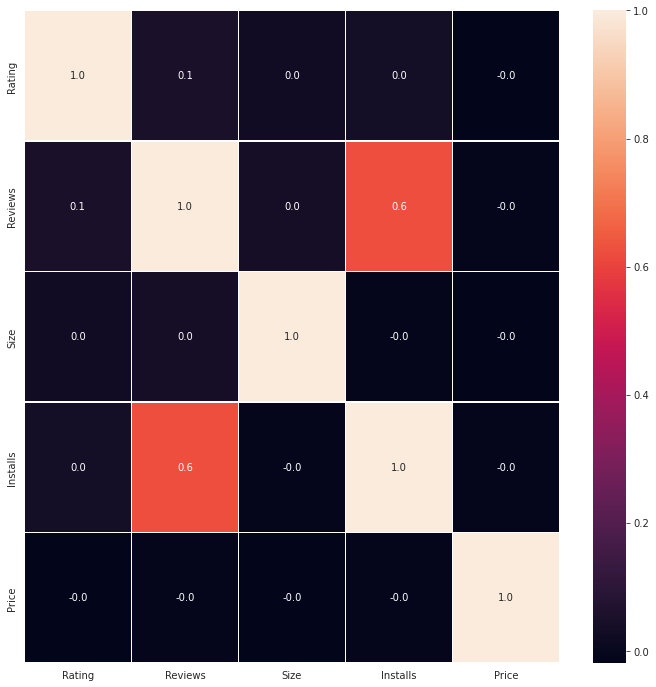

In [ ]:
# Correlation with each catagory to other catagory by using heat map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(playstore_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## -As we studied above map , it visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship with numerical value.

# **E. Lets start the study of *User Review* Data**

## This file contains the result of the sentiment analysis conducted by the dataset creator. It has 37,427 rows of data with the following 5 number of columns:

## -1. App : Name of the app.

## -2. Translated_Review: Either the original review in English, or a translated version if the orignal review is in another language.

## -3. Sentiment: The result of the sentiment analysis conducted on a review. The value is either Positive, Neutral, or Negative.

## -4. Sentiment_Polarity: A value indicating the positivity or negativity of the sentiment, values range from -1 (most negative) to 1 (most positive).

## -5. Sentiment_Subjectivity: A value from 0 to 1 indicating the subjectivity of the review. Lower values indicate the review is based on factual information, and higher values indicate the review is based on personal or public opinions or judgements.

In [ ]:
# Importing first Data Set
user_reviews = '/content/drive/MyDrive/Colab Notebooks/project1_play_store_data/User Reviews.csv'
playstore_df1 = pd.read_csv(user_reviews)
playstore_df1.dropna(inplace=True)

In [ ]:
# Verify the type of data we are going to study
type(playstore_df1)

pandas.core.frame.DataFrame

In [ ]:
# Inspecting the first five rows of the Data set 
playstore_df1.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


In [ ]:
# Printing The shape oF Data set 
playstore_df1.shape

(37427, 5)

In [ ]:
# Merge 'reviews'(playstore_df1) DataFrame with 'apps'(playstore_df) DataFrame to get 'merged_df'. We are going to use inner join for this operation.
merged_df = pd.merge(playstore_df, playstore_df1, on='App', how = 'inner')
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


## -Here Data is now ready to Study.

# **F. Exploratory Data Analysis and Visualization of User Reviews of Data**

# **1. Sentiment Analysis Based on Category.**

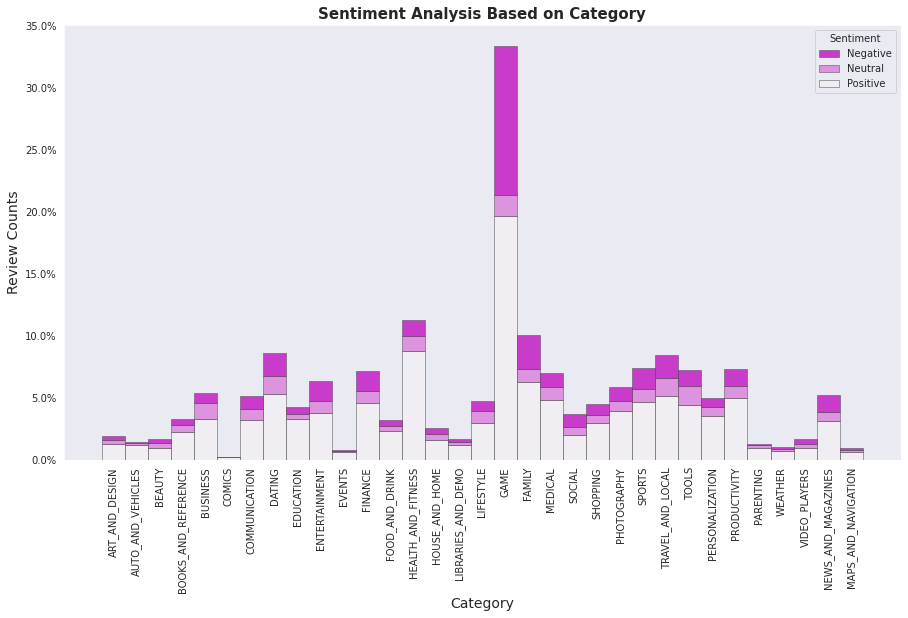

In [ ]:
from matplotlib.ticker import PercentFormatter

f = plt.figure(figsize=(15,8))
ax = f.add_subplot(1,1,1)
#sns.set_theme(style="ticks")

sns.histplot(
    data=merged_df,
    x="Category", hue="Sentiment",
    bins=34,
    ax=ax, 
    stat="count",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    legend=True
    )


ax.set_title("Sentiment Analysis Based on Category",fontsize=15,fontweight='bold')
plt.xticks(rotation='vertical')
ax.set_xlabel("Category",fontsize=14)
ax.set_ylabel("Review Counts",fontsize=14)

plt.gca().yaxis.set_major_formatter(PercentFormatter(20000))
sns.set(style="ticks")
plt.grid()
plt.show()

### -Here we notice that most of the reaction are from 'Game' catagory and very less from 'Comics', 'Events', 'Maps_And_Navigation' and 'Weather'. 
### -This shows that people take much interes in Game catagory app as compare to other apps.

# **2. Analysis of top 5 game apps having high reviews.**

In [ ]:
#Most Translated_Review app in the playstore

app=merged_df.groupby(['App','Category'])['Translated_Review'].count().reset_index()
app=pd.DataFrame(app)
#app
app=app.sort_values(by=['Translated_Review'], ascending=False)
#x=app[app['App']=='Facebook']
app.head(5)

,App,Category,Translated_Review
238,Bowmasters,GAME,312
769,Helix Jump,GAME,273
109,Angry Birds Classic,GAME,273
302,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,254
308,Candy Crush Saga,GAME,240


### -For this datset we can see that people give there reaction is written on Bowmasters,Helix Jump,Angry Birds Classic app. 
### -Such written reviews may helps the devloper to know how apps work and what types of changes needed for user.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


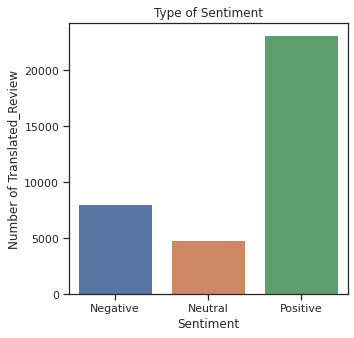

In [ ]:
# Comparing the positive and negetive review
plt.figure(figsize=(5, 5))
sns.countplot(merged_df['Sentiment'])
plt.title('Type of Sentiment')
plt.ylabel('Number of Translated_Review')
plt.show()

## -So we can easily understand there is majority of Positive reviews as compare to Negative review.









# **3. Individual sentiment analysis for top 3 translatated category.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


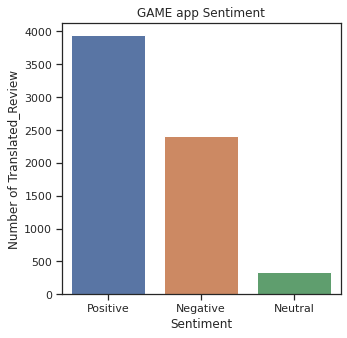

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


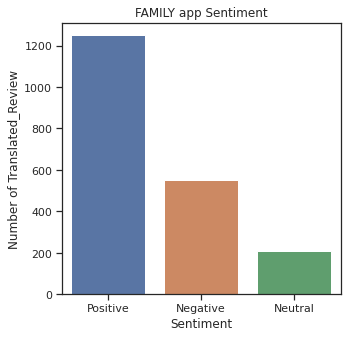

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


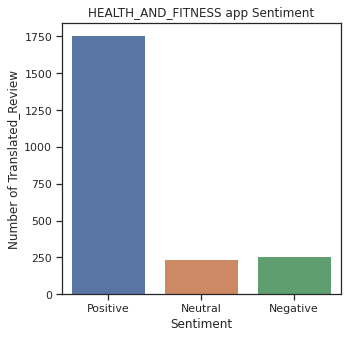

In [ ]:
# individual sentiment calculation for top 3 category app

x=['GAME','FAMILY','HEALTH_AND_FITNESS']
for i in x:
    
    df=merged_df[merged_df['Category']==i]
    
# Compare in positive and negetive review
    plt.figure(figsize=(5, 5))
    sns.countplot(df['Sentiment'])
    plt.title(f'{i} app Sentiment')
    plt.ylabel('Number of Translated_Review')
    plt.show()

## -From above graphs we notice that we got good review in Gaming catagory. As for our analysis we realise that positive review and negetive review both are high..so we conclude that pepole also give there positive and negetive feed back equaly which help to know the engagement of user with the app.

## -In second part we work on graph of family catagory. the comparision ratio of positive and negative is avarage.the ratio between positive and negative ratio is approximately 5:2 .

## -In third part we consider the highest written reviewed app catagory HEALTH_AND_FITNESS. Here we can see that the percentage of positive review is very high in compare to negative review. for this graph we conclude that only satisfied user give written review. It may create difficult to indentify why and which customer is not satisfied and also it is difficult for the devloper what should be improved in the apps.

# **4. Bar Plot of Sentiments by Rating and Content Rating.**

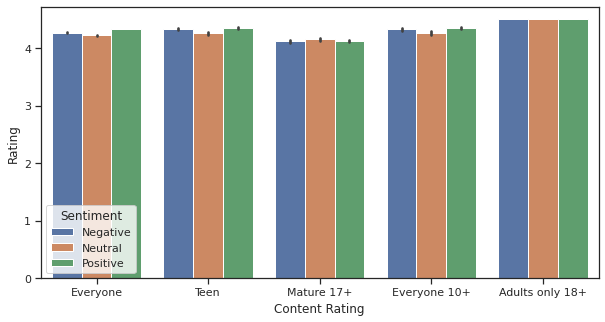

In [ ]:
# Analysing sentiment of content rating with respect to rating
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=merged_df, x="Content Rating", y="Rating",hue='Sentiment');

## -In this graph we can study by representation of rating of apps with respect to each content rating and sentiments.

# **G.  SUMMARY**

### 1. Percentage of apps of top 25 and bottom 25 category.
### 2. Study of distribution of apps in term of their type i.e. free Vs paid.
### 3. Study of distribution of average apps rating.
### 4. Study of distribution of apps in term of their rating, size and type.
### 5. Study of distribution of apps in term of Content Rating.
### 6. Finding and Counting the numbers of 5 star rating apps.
### 7. Analysing the distribution of Genres with Installs apps.
### 8. Counting the number of installed apps in terms of each Category
###    and Study the number of install apps with respect to number of user.
### 9. Study of top 5 apps on the basis of highest installs.
### 10. Study of top 5 most installed game.
### 11. Study of top 5 expensive apps.
### 12. Camparing Rating given by user from each catagory.
### 13. Correlatation with Heat map.
### 14. Sentiment Analysis Based on Category.
### 15. Analysis of top 5 game apps having high reviews.
### 16. Individual sentiment analysis for top 3 translatated category.
### 17. Bar Plot of Sentiments by Rating and Content Rating.





# **H. CONCLUSION**

### **-**That's it! We reached the end of our exercise.
### **-**Starting with loading the data so far we have done EDA , null values treatment, encoding of categorical columns, feature selection.
### **-**Throughout the project I learned many new things right from taking problem statement to understand the technical side of a product to analysis. I  had deal with missing data and outliers, I had tested some of the fundamental statistical assumptions. Python has helped a lot to understand with libraries.

###  **-**To deal with those data was really fun with many different analysis. Data cleaning and dealing with duplicate value was also most important to deal with correct methodology. Understand the dataset and predicting the solution of the problem was also great big task.

### **-**The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. 
### **-**  After analyzing the dataset I got answers to some of the serious and interesting questions which any of the android users would love to know.